In [1]:
import pandas as pd
import glob
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import style
style.use('default')
import matplotlib.patches as patches

In [3]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 0.5 #set the value globally
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 8

mpl.rc('font',**{'family':'sans-serif','serif':['Arial']})
mpl.rcParams['pdf.fonttype'] = 42

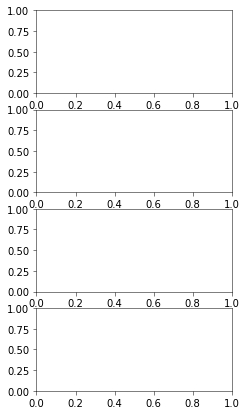

In [4]:
shapes = ['c-1', 'c-2','c-3', 'c-10']
w = 7 #half width = 3.5, full width = 7 
h = 7 # square-ish figure

# gridspec inside gridspec
f, ax = plt.subplots(4,1,figsize = (w/2,h))

In [5]:
outpath_fig = './dataFolders/Output/Figures/v2/'
outpath = './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2/'

In [5]:
# create my own colormaps for tracks
from matplotlib.colors import ListedColormap

def createMyColorMap(N, hue):
    top_color = hue['top_color']
    bottom_color = hue['bottom_color']
    vals = np.ones((N, 4))
    vals[:, 0] = np.linspace(bottom_color[0]/256, top_color[0]/256, N)
    vals[:, 1] = np.linspace(bottom_color[1]/256, top_color[1]/256, N)
    vals[:, 2] = np.linspace(bottom_color[2]/256, top_color[2]/256, N)
    newcmp = ListedColormap(vals)
    return(newcmp)

In [6]:
blue = {'top_color': [158, 202, 225], 'bottom_color': [8,81, 156]}
orange = {'top_color': [254, 237, 222], 'bottom_color': [166, 54, 3]}
red = {'top_color': [254, 229, 217], 'bottom_color': [165, 15, 21]}
multiHot = {'top_color': [240, 59, 32], 'bottom_color': [254, 217, 118]}
multiPink = {'top_color': [201, 148, 199], 'bottom_color': [152, 0, 67]}

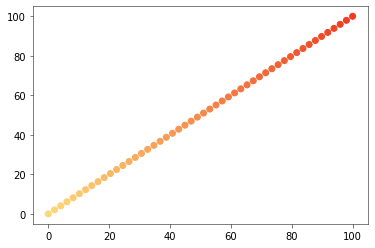

In [7]:
# test hue
N = 100
cx = np.linspace(0,N)
plt.scatter(cx, cx, c = cx, cmap = createMyColorMap(N=100,hue=multiHot))

In [8]:
# Define exponential function func,  
# where a = alpha, b = Tau, c = y intercept

def fit_to_exponential(x, a, b, c):
     return a * np.exp(-(x / b)) + c

In [9]:
fitline_color = np.asarray([8,81, 156])/256

In [10]:
# do the fit for three different y0 - computed assuming the slope = 0 for 1/2 of the data
shapes = ['c-1', 'c-2','c-3', 'c-10']

for floralShape, axes in zip(shapes, ax):
    
    axes.cla()
    file  = glob.glob(outpath + floralShape + '_Alltrials.csv')
    new_df = pd.read_csv(file[0])
    
    xdata = new_df.trialNum.values
    ydata = new_df.DiscoveryTime.values
    
    xdata_notnan = new_df[new_df.DiscoveryTime.notnull()].trialNum.values
    ydata_notnan = new_df[new_df.DiscoveryTime.notnull()].DiscoveryTime.values
    
    numMoth = len(new_df.name.unique())
    numSuccVisits = len(ydata_notnan)
    
    param_file = glob.glob(outpath + floralShape + '_FittedParameters.csv')
    param_df = pd.read_csv(param_file[0])
    
    idx = 1 # pick all the 1/4 length data from the parameter df (because 1/4 length data slope is = 0 across all shapes)
    a0 = param_df.loc[idx,'alpha']
    mean_y0 = param_df.loc[idx, 'y_intercept']
    tau = param_df.loc[idx, 'tau']
    
    #     #plot indivudual moths
    for ID, subset in new_df.groupby('name'):
                xdata_ind = subset.trialNum.values
                ydata_ind = subset.DiscoveryTime.values/100
                axes.plot(xdata_ind, ydata_ind, marker = 'o', markersize = '2',alpha = 0.8)
    
    # plot the final curve fit
    max_trial=max(xdata_notnan)
    axes.plot(range(0,max_trial), fit_to_exponential(range(0,max_trial), a0, tau , mean_y0), 
             '-', 
              color = 'k', 
              linewidth=1)

    axes.set_xlim([-3,65])
    axes.set_ylim([0,60])

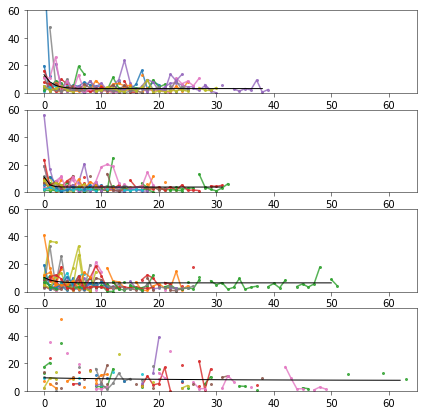

In [11]:
f

In [12]:
# add emblishments
for aa in ax[:-1]:
    plt.setp(aa.get_xticklabels(), visible=False)
    
for aa in ax:
    aa.tick_params(direction = 'out', axis='both')
    aa.spines['top'].set_visible(False)
    aa.spines['right'].set_visible(False)

ax[2].set_ylabel('Exploration Time (second)')
ax[3].set_xlabel('Visit Number')

Text(0.5, 3.200000000000003, 'Visit Number')

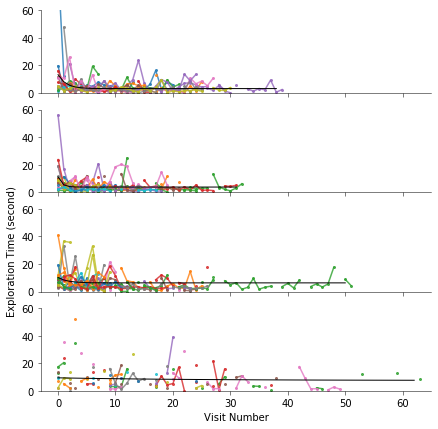

In [13]:
f

In [14]:
f.savefig(r"./dataFolders/Output/Figures/v2/FinalFigures/" + 'learningCurvesForIndividualMoths.pdf')

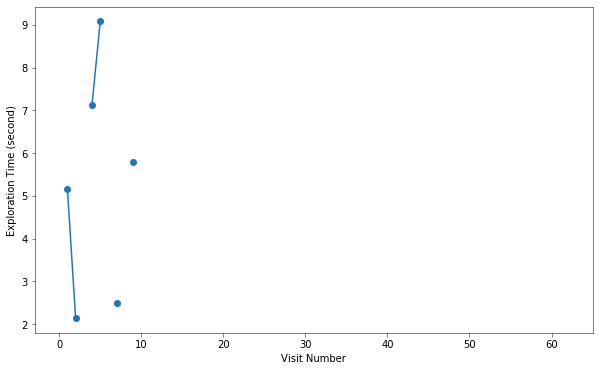

In [15]:
# save each moth separately

f1 = plt.figure(figsize = (10,6))

for floralShape in shapes:
          
    file  = glob.glob(outpath + floralShape + '_Alltrials.csv')
    new_df = pd.read_csv(file[0])
    
    xdata = new_df.trialNum.values
    ydata = new_df.DiscoveryTime.values/100
    
    numSuccVisits = len(ydata_notnan)
    
    #plot indivudual moths
    for ID, subset in new_df.groupby('name'):
        f1.clf()
        xdata_ind = subset.trialNum.values
        ydata_ind = subset.DiscoveryTime.values/100
        plt.plot(xdata_ind, ydata_ind, marker = 'o', markersize = '6')

        plt.xlim([-3,65])
        plt.ylabel('Exploration Time (second)')
        plt.xlabel('Visit Number')
        f1.savefig(r"./dataFolders/Output/Figures/v2/FinalFigures/IndividualMothLearningCurves/" + ID + '.pdf')